In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.arima_process as arima_process

# Create a process and take a sample

In [26]:
process = arima_process.ArmaProcess(ar=[1, -0.8], ma=[1])

In [27]:
process

ArmaProcess([1.0, -0.8], [1.0], nobs=100) at 0x3197e38e0

In [28]:
z = process.generate_sample(nsample=100)
z

array([ 7.67934013e-01,  1.06493360e+00,  1.73647637e+00,  9.56376109e-01,
        9.34342266e-01, -1.17678353e+00,  4.65745190e-01, -1.12390316e+00,
       -1.67380429e+00, -1.98764622e+00, -1.98518844e+00, -1.31217361e+00,
       -1.78258625e+00, -1.04845633e+00, -3.14496405e+00, -1.20161249e+00,
       -1.94481662e+00, -1.64860240e+00, -5.67244871e-01, -9.87814030e-01,
       -2.28653859e-01,  3.60061528e-01, -1.36209688e+00, -9.07157910e-01,
       -4.73636693e-01, -8.04882627e-01, -9.67697386e-01, -1.47071359e+00,
        1.23562645e+00,  8.23547334e-02,  9.40486461e-01,  1.05307034e+00,
       -2.34726596e-01, -5.62544523e-02,  1.23494466e-02, -2.00315554e-01,
       -1.29697517e+00, -2.40713544e+00, -8.11777331e-01, -1.04816408e+00,
       -1.77481345e+00, -1.00473238e+00, -1.01655481e+00, -5.37005030e-01,
       -7.63611654e-01,  3.88035976e-01,  2.80546936e-01, -1.00590800e-01,
       -3.50670548e-01, -8.18374916e-01, -1.35137461e+00, -4.32605479e-01,
        1.06177266e+00,  

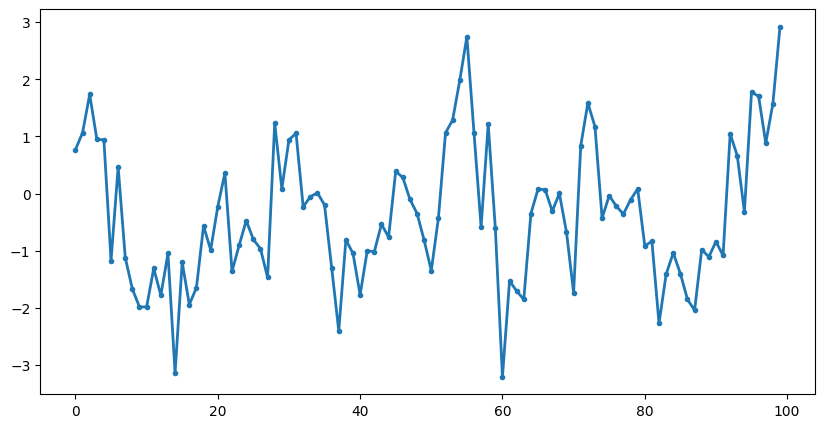

In [29]:
plt.figure(figsize=(10, 5))
plt.plot(z, linewidth=2, marker='.')

# Compute autocorrelations

In [30]:
acf = process.acf(lags=20)
acf

array([1.        , 0.8       , 0.64      , 0.512     , 0.4096    ,
       0.32768   , 0.262144  , 0.2097152 , 0.16777216, 0.13421773,
       0.10737418, 0.08589935, 0.06871948, 0.05497558, 0.04398047,
       0.03518437, 0.0281475 , 0.022518  , 0.0180144 , 0.01441152])

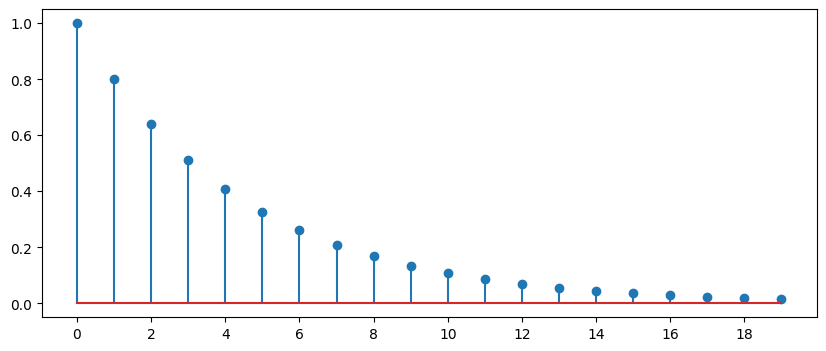

In [31]:
plt.figure(figsize=(10, 4))
plt.stem(acf)
plt.xticks(ticks=range(0, 20, 2))
plt.show()

# Plotting sample autocorrelations

In [32]:
import statsmodels.graphics.tsaplots as tsaplots

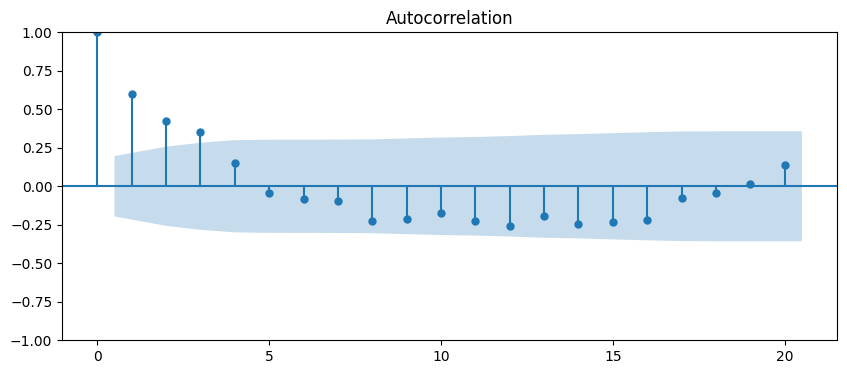

In [33]:
fig, ax = plt.subplots(figsize=(10, 4))
tsaplots.plot_acf(z, lags=20, ax=ax)
plt.show()

# Sunspots data

In [34]:
sunspots = pd.read_csv('data/Sunspots.csv')
sunspots.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [35]:
pd.to_datetime(sunspots.loc[0, 'Date'])

Timestamp('1749-01-31 00:00:00')

In [36]:
sunspots = sunspots.set_index(
    pd.to_datetime(sunspots['Date'])
).drop(
    columns=['Unnamed: 0', 'Date']
).rename(
    columns={'Monthly Mean Total Sunspot Number': 'values'}
)
sunspots.head()

,values
Date,
1749-01-31,96.7
1749-02-28,104.3
1749-03-31,116.7
1749-04-30,92.8
1749-05-31,141.7


<Axes: xlabel='Date'>

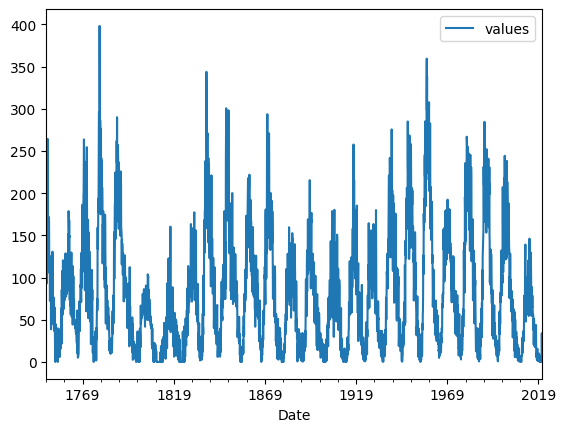

In [37]:
sunspots.plot()

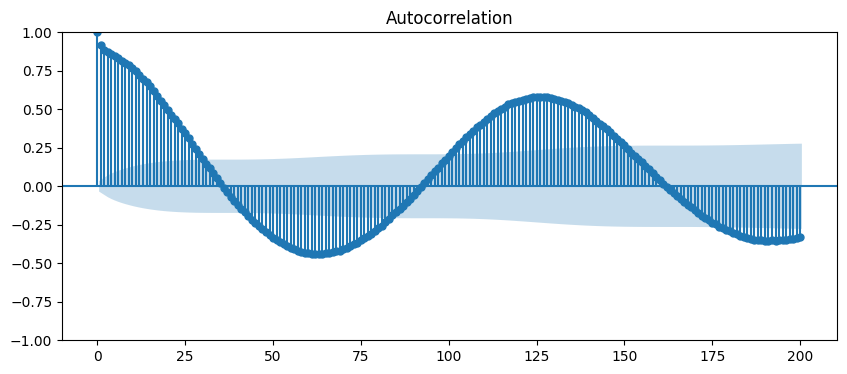

In [40]:
fig, ax = plt.subplots(figsize=(10, 4))
tsaplots.plot_acf(sunspots, lags=200, ax=ax)
plt.show()

The sinusoidal shape indicates this is not stationary. Stationary functions' autocorrelations decay steadily to 0

In [43]:
diff_sunspots = sunspots.diff().dropna()

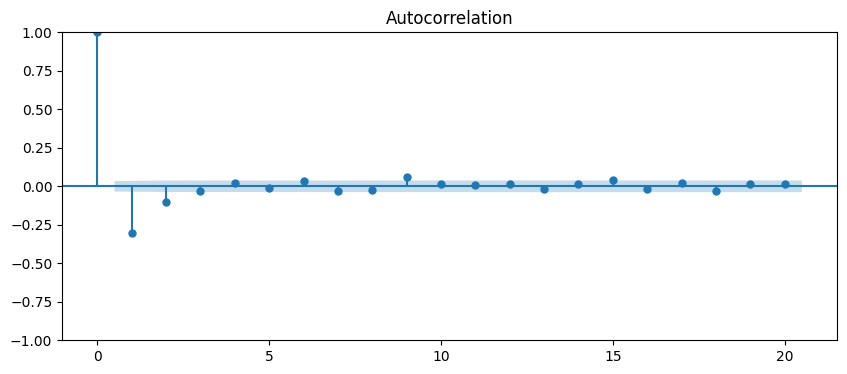

In [46]:
fig, ax = plt.subplots(figsize=(10, 4))
tsaplots.plot_acf(diff_sunspots, lags=20, ax=ax)
plt.show()